# KNN

## imports

In [1]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import itertools
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../lib")))

from model_helper import load_and_format_data, test_and_eval, format_for_model

## constants

In [2]:
GARAGES = ["North Garage", "West Garage", "South Garage"]

# choose dates used in dataset name
DATE_START = "2025-02-13"
DATE_END = "2025-04-14"
NEIGHBORS = 3

## experiment for entire normalized dataset

### load and format data

In [3]:
# garage used as key with each one assigned a tuple representing the (x_data, y_data)
garage_data = {}

for garage in GARAGES:
    garage_data[garage] = load_and_format_data(garage, DATE_START, DATE_END)

### train model

In [4]:
# keys are each garage with value being params or list of weights made
garage_models = {}
for garage in garage_data.keys():
    flat_x_data = list(itertools.chain.from_iterable(garage_data[garage][0]))
    flat_y_data = list(itertools.chain.from_iterable(garage_data[garage][1]))
    tree_model = KNeighborsRegressor(n_neighbors=NEIGHBORS)
    tree_model.fit(format_for_model(flat_x_data), format_for_model(flat_y_data))
    garage_models[garage] = tree_model

### inference, plot, and stats

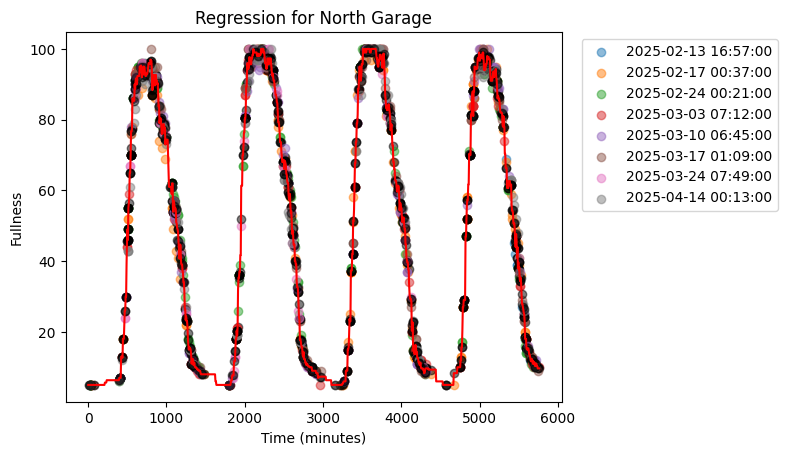

North Garage stats
r^2: 0.9965910950910973
rmse: 1.2803252032520327
mae: 1.9504151458580332




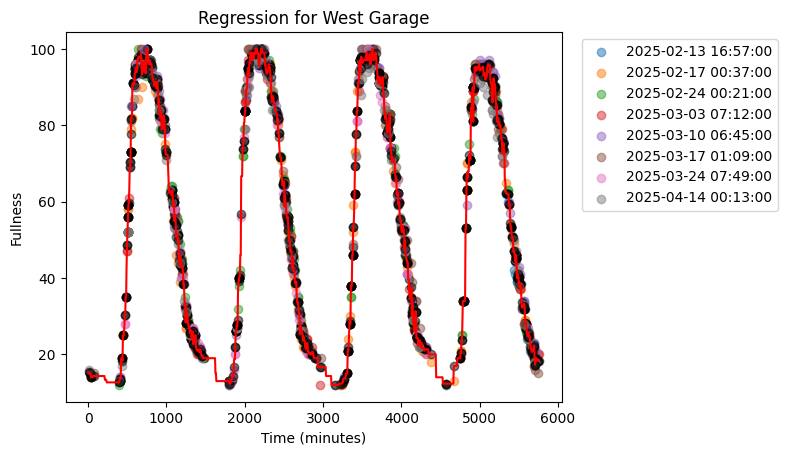

West Garage stats
r^2: 0.9961769947948843
rmse: 1.2198303979125897
mae: 1.8106135353000612




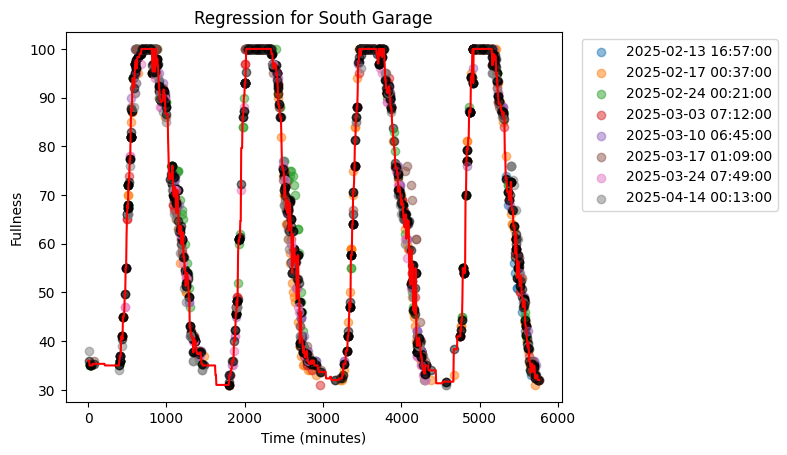

South Garage stats
r^2: 0.9899967015837794
rmse: 1.3382113821138213
mae: 2.4455700783518926




In [5]:
for garage in garage_models:
    formatted_x_data = [format_for_model(s.to_list()) for s in garage_data[garage][0]]
    test_and_eval(garage, garage_data[garage][2], formatted_x_data, garage_data[garage][1], garage_models[garage].predict)



## partitioned experiment

### format and load model

In [6]:
garage_training_data = {}

for garage in GARAGES:
    garage_training_data[garage] = load_and_format_data(garage, DATE_START, DATE_END, "d_starting", "training")

### train model

In [7]:
# keys are each garage with value being params or list of weights made
garage_models = {}
for garage in garage_training_data.keys():
    flat_x_data = list(itertools.chain.from_iterable(garage_training_data[garage][0]))
    flat_y_data = list(itertools.chain.from_iterable(garage_training_data[garage][1]))
    tree_model = KNeighborsRegressor(n_neighbors=NEIGHBORS)
    tree_model.fit(format_for_model(flat_x_data), format_for_model(flat_y_data))
    garage_models[garage] = tree_model

### inference, plot, and stats 

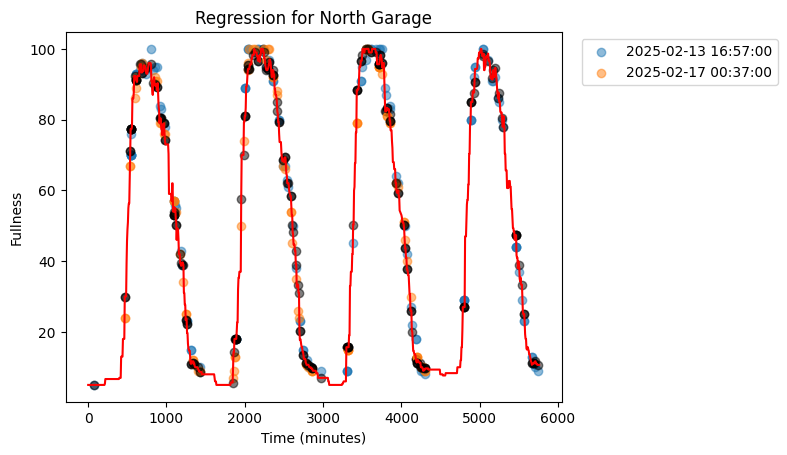

North Garage stats
r^2: 0.9894597891235248
rmse: 2.6913043478260867
mae: 3.5164897956757657




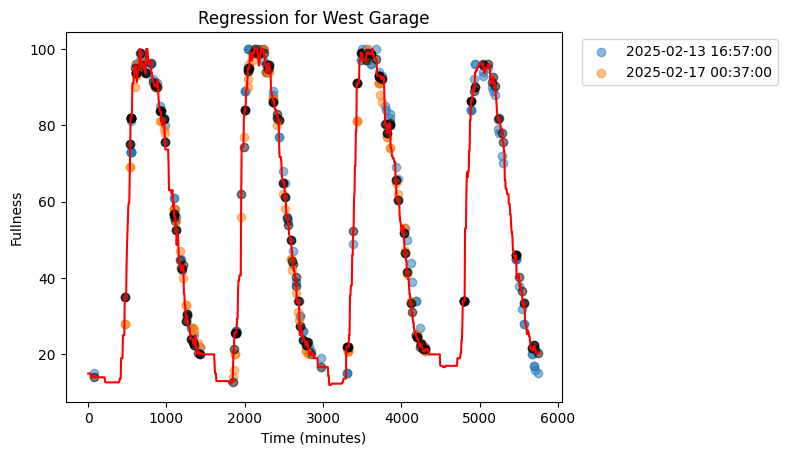

West Garage stats
r^2: 0.9836274341107022
rmse: 2.882525697503671
mae: 3.781152217256485




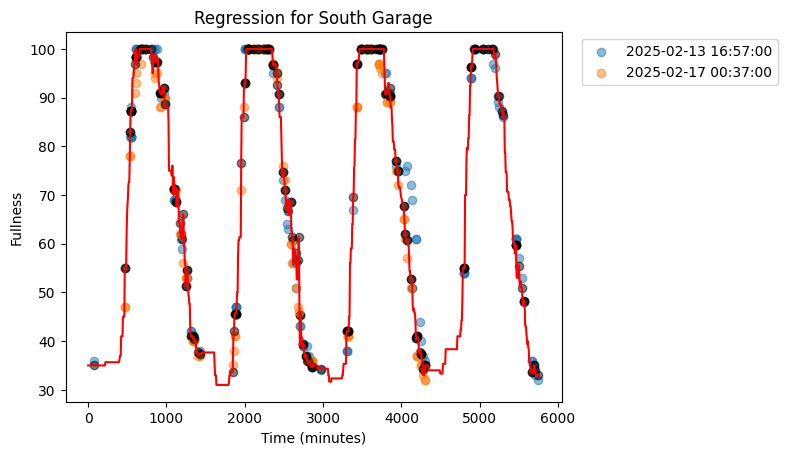

South Garage stats
r^2: 0.9700102228004233
rmse: 2.537681159420289
mae: 4.279543521641436




In [8]:
for garage in garage_models:
    x_data, y_data, start_dates = load_and_format_data(garage, DATE_START, DATE_END, "d_starting", "test")
    formatted_x_data = [format_for_model(s.to_list()) for s in x_data]
    test_and_eval(garage, garage_data[garage][2], formatted_x_data, y_data, garage_models[garage].predict)

